# Classfication with the correct formatted epoch of 500ms
* this notebook will first label the epoch data events as 4: Language or 5 : nonlanguage. Then do classification on the labeled epoch data
* The goal is to be able to classfy the correct data based on language vs. nonlanguage and see what kind of scores we get.

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from mne.decoding import Vectorizer
from sklearn.preprocessing import MinMaxScaler
from mne.decoding import SPoC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split as tts
import mne
from sklearn.model_selection import StratifiedKFold
from mne.datasets import sample
from mne.decoding import (SlidingEstimator, GeneralizingEstimator,
                          cross_val_multiscore, LinearModel, get_coef)
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE 
import os
from mne.decoding import UnsupervisedSpatialFilter
import os.path as op
from os import listdir
from os.path import isfile, join
from collections import defaultdict
from scipy.stats import skew, kurtosis
import mne 

from mne.decoding import Vectorizer
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.svm import SVC  # noqa
from sklearn.model_selection import ShuffleSplit  # noqa

from mne.decoding import UnsupervisedSpatialFilter
from sklearn.decomposition import PCA
from scipy.stats import skew, kurtosis
from sklearn.metrics import confusion_matrix
from mne.viz import tight_layout

import time

In [2]:
%run Batch_ArtifactFilter_Epoch.ipynb

In [102]:
epoch=remove_artifacts_and_create_epochs('C:\\USB Drive\\NewEEG-200s\\SA20140205\\20140205_1230.set')

Reading C:\USB Drive\NewEEG-200s\SA20140205\20140205_1230.fdt
Reading 0 ... 838231  =      0.000 ...  1637.170 secs...
5974 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
time difference 1.3828125
[6412    0    4]
[7120    0  130]

 **1 bad trials dropped**
Setting up band-stop filter
Filter length of 3379 samples (6.600 sec) selected
Setting up band-pass filter from 5 - 1e+02 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 25.0 Hz
Filter length of 845 samples (1.650 sec) selected
5974 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]


[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:   36.2s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:   50.6s finished


5565 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128


C:\Users\new user\New folder\envs\py36\lib\site-packages\sklearn\decomposition\fastica_.py:118: UserWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


Fitting ICA took 587.4s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
1977 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 1977 events and 500 original time points ...
999 bad epochs dropped


In [4]:
epochs=[[]]
j=0
for i in range(len(epoch.events[:,-1])):
    if i % 3 ==0:
       
        epochs.append([])
        j=j+1
        epochs[j].append(epoch.events[i,-1])
      
        
    else:
        epochs[j].append(epoch.events[i,-1])
        # Convert the epoch data into list of list
        #Each list contains three event ids as 1 trial

In [5]:
np.shape(epoch)

(978, 129, 500)

In [6]:
epochs

[[],
 [5, 6, 4],
 [5, 6, 4],
 [5, 6, 4],
 [5, 6, 4],
 [5, 6, 4],
 [5, 6, 4],
 [5, 6, 4],
 [5, 6, 4],
 [5, 6, 4],
 [5, 6, 4],
 [5, 6, 4],
 [5, 6, 4],
 [5, 6, 4],
 [5, 6, 4],
 [5, 6, 4],
 [5, 6, 4],
 [5, 6, 4],
 [5, 6, 4],
 [5, 6, 4],
 [8, 12, 7],
 [8, 12, 7],
 [8, 12, 7],
 [8, 12, 7],
 [8, 12, 7],
 [8, 12, 7],
 [8, 12, 7],
 [8, 12, 7],
 [8, 12, 7],
 [8, 12, 7],
 [8, 12, 7],
 [8, 12, 7],
 [8, 12, 7],
 [8, 12, 7],
 [8, 12, 7],
 [8, 12, 7],
 [8, 12, 7],
 [8, 12, 7],
 [8, 12, 7],
 [8, 12, 7],
 [11, 6, 10],
 [11, 6, 10],
 [11, 6, 10],
 [11, 6, 10],
 [11, 6, 10],
 [11, 6, 10],
 [11, 6, 10],
 [11, 6, 10],
 [11, 6, 10],
 [11, 6, 10],
 [11, 6, 10],
 [11, 6, 10],
 [11, 6, 10],
 [11, 6, 10],
 [11, 6, 10],
 [11, 6, 10],
 [11, 6, 10],
 [11, 6, 10],
 [11, 6, 10],
 [11, 6, 10],
 [2, 3, 1],
 [2, 3, 1],
 [2, 3, 1],
 [2, 3, 1],
 [2, 3, 1],
 [2, 3, 1],
 [2, 3, 1],
 [2, 3, 1],
 [2, 3, 1],
 [2, 3, 1],
 [2, 3, 1],
 [2, 3, 1],
 [2, 3, 1],
 [2, 3, 1],
 [2, 3, 1],
 [2, 3, 1],
 [2, 3, 1],
 [2, 3, 1],
 [2, 3, 1],

In [36]:
epoch.events[2,-1]

13

In [18]:
epoch.events[:,-1]

array([14, 21, 13, 14, 21, 13, 14, 21, 13, 14, 21, 13, 14, 21, 13, 14, 21,
       13, 14, 21, 13, 14, 21, 13, 14, 21, 13, 14, 21, 13, 14, 21, 13, 14,
       21, 13, 14, 21, 13, 14, 21, 13, 14, 21, 13, 14, 21, 13, 14, 21, 13,
       14, 21, 13, 14, 21, 13, 20, 15, 19, 20, 15, 19, 20, 15, 19, 20, 15,
       19, 20, 15, 19, 20, 15, 19, 20, 15, 19, 20, 15, 19, 20, 15, 19, 20,
       15, 19, 20, 15, 19, 20, 15, 19, 20, 15, 19, 20, 15, 19, 20, 15, 19,
       20, 15, 19, 20, 15, 19, 20, 15, 19, 20, 15, 19, 20, 15, 19,  5, 12,
        4,  5, 12,  4,  5, 12,  4,  5, 12,  4,  5, 12,  4,  5, 12,  4,  5,
       12,  4,  5, 12,  4,  5, 12,  4,  5, 12,  4,  5, 12,  4,  5, 12,  4,
        5, 12,  4,  5, 12,  4,  5, 12,  4,  5, 12,  4,  5, 12,  4,  5, 12,
        4,  5, 12,  4,  5, 12,  4, 17, 24, 16, 17, 24, 16, 17, 24, 16, 17,
       24, 16, 17, 24, 16, 17, 24, 16, 17, 24, 16, 17, 24, 16, 17, 24, 16,
       17, 24, 16, 17, 24, 16, 17, 24, 16, 17, 24, 16, 17, 24, 16, 17, 24,
       16, 17, 24, 16, 17

In [7]:
for events in epochs:
    if  4 in events or 1 in events or 13 in events or 16 in events:
        for i in range(len(events)):
                events[i]=4
    else:
        for i in range(len(events)):
                events[i]=5
        # Label each trial as either Language or non-language

In [8]:
epochs

[[],
 [4, 4, 4],
 [4, 4, 4],
 [4, 4, 4],
 [4, 4, 4],
 [4, 4, 4],
 [4, 4, 4],
 [4, 4, 4],
 [4, 4, 4],
 [4, 4, 4],
 [4, 4, 4],
 [4, 4, 4],
 [4, 4, 4],
 [4, 4, 4],
 [4, 4, 4],
 [4, 4, 4],
 [4, 4, 4],
 [4, 4, 4],
 [4, 4, 4],
 [4, 4, 4],
 [5, 5, 5],
 [5, 5, 5],
 [5, 5, 5],
 [5, 5, 5],
 [5, 5, 5],
 [5, 5, 5],
 [5, 5, 5],
 [5, 5, 5],
 [5, 5, 5],
 [5, 5, 5],
 [5, 5, 5],
 [5, 5, 5],
 [5, 5, 5],
 [5, 5, 5],
 [5, 5, 5],
 [5, 5, 5],
 [5, 5, 5],
 [5, 5, 5],
 [5, 5, 5],
 [5, 5, 5],
 [5, 5, 5],
 [5, 5, 5],
 [5, 5, 5],
 [5, 5, 5],
 [5, 5, 5],
 [5, 5, 5],
 [5, 5, 5],
 [5, 5, 5],
 [5, 5, 5],
 [5, 5, 5],
 [5, 5, 5],
 [5, 5, 5],
 [5, 5, 5],
 [5, 5, 5],
 [5, 5, 5],
 [5, 5, 5],
 [5, 5, 5],
 [5, 5, 5],
 [5, 5, 5],
 [5, 5, 5],
 [4, 4, 4],
 [4, 4, 4],
 [4, 4, 4],
 [4, 4, 4],
 [4, 4, 4],
 [4, 4, 4],
 [4, 4, 4],
 [4, 4, 4],
 [4, 4, 4],
 [4, 4, 4],
 [4, 4, 4],
 [4, 4, 4],
 [4, 4, 4],
 [4, 4, 4],
 [4, 4, 4],
 [4, 4, 4],
 [4, 4, 4],
 [4, 4, 4],
 [4, 4, 4],
 [4, 4, 4],
 [5, 5, 5],
 [5, 5, 5],
 [5, 5, 5],
 [5, 5, 5],

In [9]:
epochs.pop(0)
flattened_list = [y for x in epochs for y in x]
for i in range(len(epoch.events)):
    epoch.events[i]=flattened_list[i]

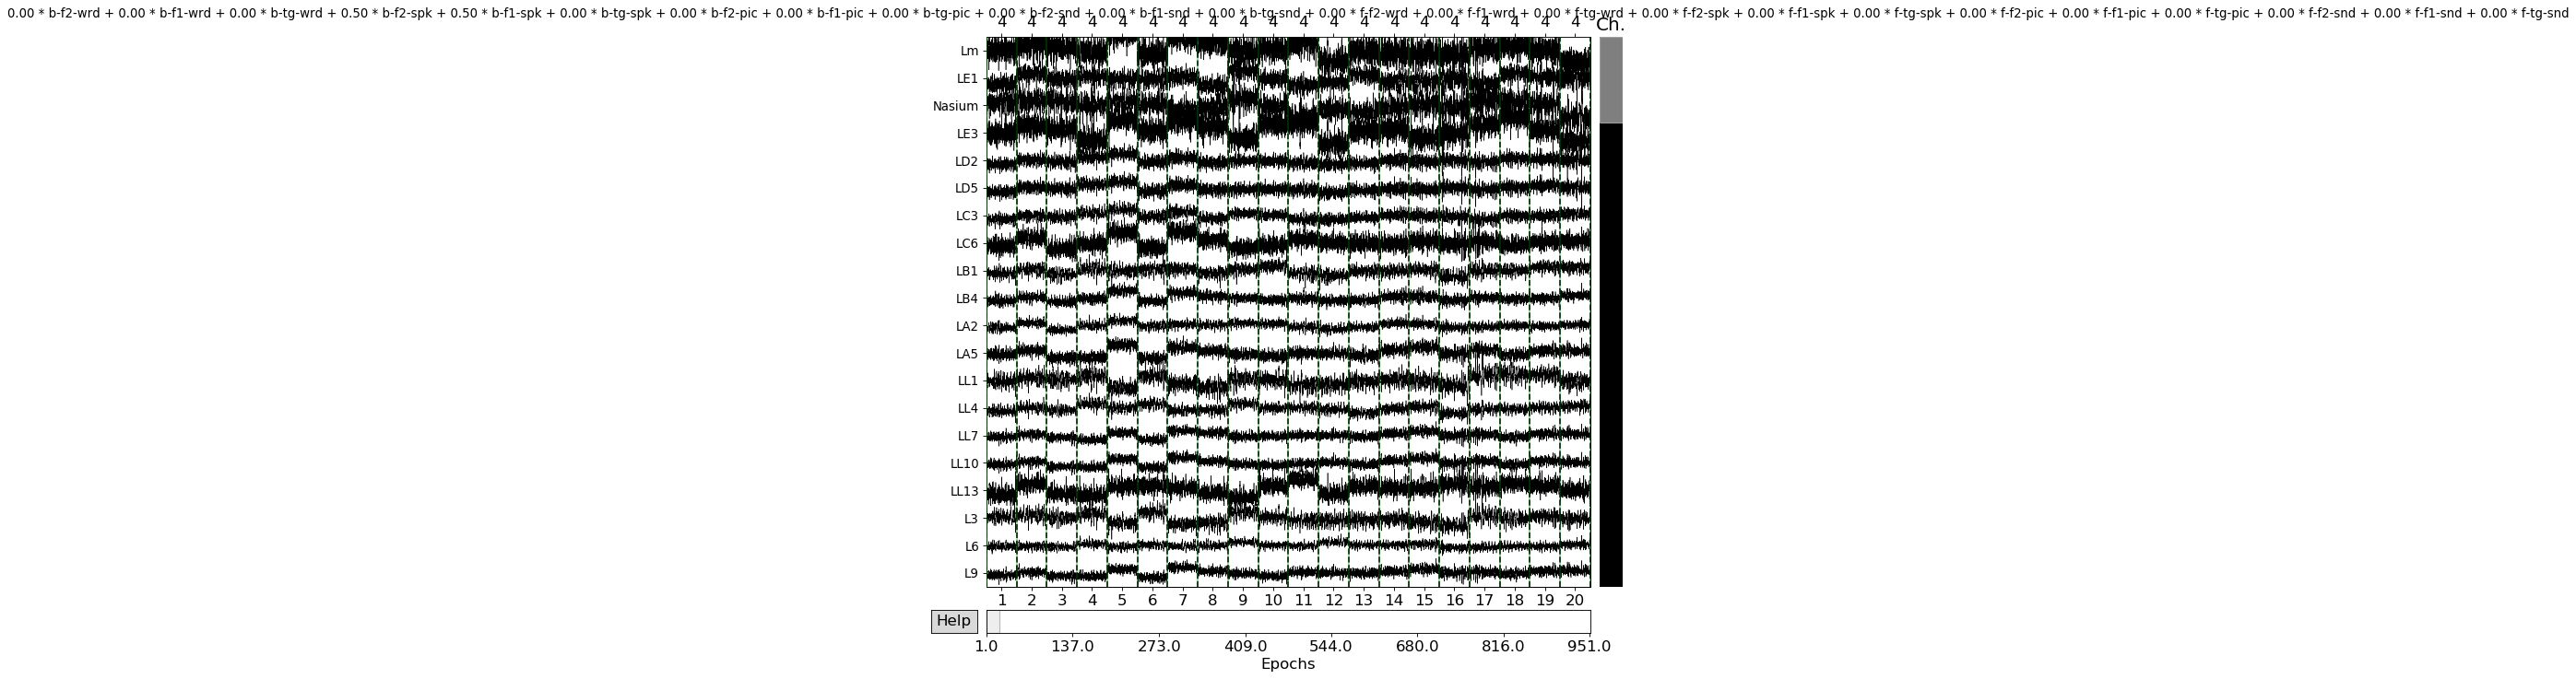

In [61]:
epoch.plot()

In [65]:
def classify_test_KNN(X,y):

    clf = make_pipeline(Vectorizer(),
                        StandardScaler(),
                        KNN(n_neighbors=11))
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)
    
    clf.fit(X_train, y_train)
    
    score = clf.score(X_test, y_test)
    
    return score
epoch.events[:,-1]

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5,

In [69]:
def filter_event_id(epoch):
    epochs=[[]]
    j=0
    for i in range(len(epoch.events[:,-1])):
        if i % 3 ==0:
            epochs.append([])
            j=j+1
            epochs[j].append(epoch.events[i,-1])
        else:
            epochs[j].append(epoch.events[i,-1])
    for events in epochs:
        if  4 in events or 1 in events or 13 in events or 16 in events:
            for i in range(len(events)):
                    events[i]=4
        else:
            for i in range(len(events)):
                    events[i]=5
    epochs.pop(0)
    flattened_list = [y for x in epochs for y in x]
    for i in range(len(epoch.events)):
        epoch.events[i]=flattened_list[i]
    return epoch

In [70]:
def get_samples_targets(epochs):
    X = epochs.get_data();
    y = epochs.events[:,-1]
    return X, y

In [71]:
X = epoch.get_data()
y=epoch.events[:,-1]

clf = make_pipeline(Vectorizer(),
                        KNN(n_neighbors=13))
    
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)
    
clf.fit(X_train, y_train)
    
score = clf.score(X_test, y_test)
print (score)
#classfication with KNN.

0.46503496503496505


In [79]:
path = 'C:\\USB Drive\\NewEEG-200s'

eeglab_files = os.listdir(path)
eeglab_dict = search_folders(path, eeglab_files)
eeglab_files = paths_of_eeglab_files(path, eeglab_dict)
for f in eeglab_files:
    print(f)

C:\USB Drive\NewEEG-200s\SA20131216\20131216_1310.set
C:\USB Drive\NewEEG-200s\SA20131216\20131216_1441.set
C:\USB Drive\NewEEG-200s\SA20140205\20140205_1114.set
C:\USB Drive\NewEEG-200s\SA20140205\20140205_1230.set
C:\USB Drive\NewEEG-200s\SA20140206\20140206_1029.set
C:\USB Drive\NewEEG-200s\SA20140206\20140206_1151.set
C:\USB Drive\NewEEG-200s\SA20140207\20140207_1146.set
C:\USB Drive\NewEEG-200s\SA20140207\20140207_1219.set
C:\USB Drive\NewEEG-200s\SA20140217\20140217_1136.set
C:\USB Drive\NewEEG-200s\SA20140217\20140217_1211.set
C:\USB Drive\NewEEG-200s\SA20140219\20140219_1046.set
C:\USB Drive\NewEEG-200s\SA20140219\20140219_1205.set
C:\USB Drive\NewEEG-200s\SA20140220\20140220_1009.set
C:\USB Drive\NewEEG-200s\SA20140220\20140220_1123.set
C:\USB Drive\NewEEG-200s\SA20140225\20140225_1422.set
C:\USB Drive\NewEEG-200s\SA20140225\20140225_1552.set
C:\USB Drive\NewEEG-200s\SA20140227A\20140227_1058.set
C:\USB Drive\NewEEG-200s\SA20140227A\20140227_1220.set
C:\USB Drive\NewEEG-200s\S

In [88]:
scores1 = []

path = 'C:\\USB Drive\\NewEEG-200s'

eeglab_files = os.listdir(path)
eeglab_dict = search_folders(path, eeglab_files)
eeglab_files = paths_of_eeglab_files(path, eeglab_dict)
for f in eeglab_files:
    epoch=remove_artifacts_and_create_epochs(f)
    epoch = filter_event_id(epoch)
    X,y = get_samples_targets(epoch)
    scores1.append([f, classify_test_KNN(X,y)])
    print(scores1)

Reading C:\USB Drive\NewEEG-200s\SA20140205\20140205_1230.fdt
Reading 0 ... 838231  =      0.000 ...  1637.170 secs...
5793 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]


ValueError: You have 1249 events shorter than the shortest_event. These are very unusual and you may want to set min_duration to a larger value e.g. x / raw.info['sfreq']. Where x = 1 sample shorter than the shortest event length.

In [83]:
epoch=remove_artifacts_and_create_epochs('C:\\USB Drive\\NewEEG-200s\\SA20131216\\20131216_1310.set')

Reading C:\USB Drive\NewEEG-200s\SA20131216\1.fdt
Reading 0 ... 929277  =      0.000 ...  1814.994 secs...


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\USB Drive\\NewEEG-200s\\SA20131216\\1.fdt'

In [10]:
def filter_event_id(epoch):
    epochs=[[]]
    j=0
    for i in range(len(epoch.events[:,-1])):
        if i % 3 ==0:
            epochs.append([])
            j=j+1
            epochs[j].append(epoch.events[i,-1])
        else:
            epochs[j].append(epoch.events[i,-1])
    for events in epochs:
        if  4 in events or 1 in events or 13 in events or 16 in events:
            for i in range(len(events)):
                    events[i]=4
        else:
            for i in range(len(events)):
                    events[i]=5
    epochs.pop(0)
    flattened_list = [y for x in epochs for y in x]
    for i in range(len(epoch.events)):
        epoch.events[i]=flattened_list[i]
    return epoch

In [11]:
filter_event_id(epoch)

<Epochs  |   978 events (all good), 0 - 1.94922 sec, baseline [None, 0], ~481.6 MB, data loaded,
 'b-f1-pic': 0
 'b-f1-snd': 0
 'b-f1-spk': 600
 'b-f1-wrd': 0
 'b-f2-pic': 0
 'b-f2-snd': 0
 'b-f2-spk': 378
 'b-f2-wrd': 0
 'b-tg-pic': 0
 'b-tg-snd': 0
 'b-tg-spk': 0
 'b-tg-wrd': 0
 'f-f1-pic': 0
 'f-f1-snd': 0
 'f-f1-spk': 0
 'f-f1-wrd': 0
 'f-f2-pic': 0
 'f-f2-snd': 0
 'f-f2-spk': 0
 'f-f2-wrd': 0
 'f-tg-pic': 0
 'f-tg-snd': 0
 'f-tg-spk': 0
 'f-tg-wrd': 0>

In [31]:
epoch.events.shape

(978, 3)

In [15]:
# do PCA to reduce dimensions and data needed for classification.
pca = UnsupervisedSpatialFilter(PCA(28), average=False) # PCA, keep 9 components 

epoch_data = epoch.get_data()
pca_data = pca.fit_transform(epoch_data)

In [30]:
pca_data.shape

(978, 28, 500)

In [18]:
def get_mean_band(data):
    final_variances = []
    for d in data:
    #     print (data.shape)
        variances = []
        skewnesses = []
        kurtosises = []
        stats = []
        for channel in d:
    #         print(channel.shape)
            var = channel.var()
            variances.append(var)
            
            skewness = skew(channel, axis=0)
#             print(skewness)

            skewnesses.append(skewness)
#             print(skewness)
            kurt = kurtosis(channel)
            kurtosises.append(kurt)
#         print(skewnesses)
#         mean_skew = np.mean(skewnesses)
#         stats.append(mean_skew)
#         stats.append(np.mean(variances))
        final_variances.append([np.mean(variances), np.mean(skewnesses), np.mean(kurtosises)])
    
    return np.array(final_variances)

In [27]:
mean_statisitcs = get_mean_band(pca_data)
epoch.events

array([[4, 4, 4],
       [4, 4, 4],
       [4, 4, 4],
       ...,
       [4, 4, 4],
       [4, 4, 4],
       [4, 4, 4]])

In [28]:
mean_statisitcs.shape
epoch.events.shape

(978, 3)

In [24]:
mean_statisitcs = mean_statisitcs.swapaxes(0,1)

In [25]:
mean_statisitcs.shape

(3, 978)

In [26]:
# classification pipeline
start = time.time()
clf = make_pipeline(Vectorizer(),
                    StandardScaler(),
                    LogisticRegression(penalty='l1'))
end = time.time()
print("clf elapsed time: {0}".format(end - start))

start_master = time.time()
cv = StratifiedKFold(n_splits=5, shuffle = True, random_state = 42)

labels = epoch.events[:,-1]
preds = np.empty(len(mean_statisitcs))
for train, test in cv.split(mean_statisitcs, labels):
    start = time.time()
    clf.fit(mean_statisitcs[train], labels[train])
    preds[test] = clf.predict(mean_statisitcs[test])
    end = time.time()
    print("kfold elapsed time: {0}".format(end - start))
end = time.time()
print("classification elapsed time: {0}".format(end - start_master))


start = time.time()
target_names = ['Audio', 'Visual']
report = classification_report(labels, preds, target_names=target_names)
print(report)
end = time.time()
print("reporting elapsed time: {0}".format(end - start))

clf elapsed time: 0.04986715316772461


ValueError: Found input variables with inconsistent numbers of samples: [3, 978]

In [38]:
epoch_data = epoch.get_data()
epoch_data.shape

(978, 129, 500)

In [34]:
pca_data.shape

(978, 28, 500)

In [39]:
def get_mean_band(data):
    final_variances = []
    for d in data:
    #     print (data.shape)
        variances = []
        skewnesses = []
        kurtosises = []
        stats = []
        for channel in d:
    #         print(channel.shape)
            var = channel.var()
            variances.append(var)
            
            skewness = skew(channel, axis=0)
#             print(skewness)

            skewnesses.append(skewness)
#             print(skewness)
            kurt = kurtosis(channel)
            kurtosises.append(kurt)
#         print(skewnesses)
#         mean_skew = np.mean(skewnesses)
#         stats.append(mean_skew)
#         stats.append(np.mean(variances))
        final_variances.append([variances, skewnesses, kurtosises])
    
    return np.array(final_variances)

In [73]:
mean_statisitcs = get_mean_band(pca_data)

In [74]:
Kurtosis_data = mean_statisitcs.swapaxes(1,2)
Kurtosis_data.shape

(978, 28, 3)

In [93]:
labels =epoch.events[:,-1]
score2 = []
for train,test in cv.split(Kurtosis_data,target_V_vs_A):
    X_train = Kurtosis_data[train] 
    #print("shape of training features(data):",X_train.shape)
    y_train =labels [train] 
    #print("shape of training target:",y_train.shape)
    X_test = Kurtosis_data[test] 
    #print("shape of testing data:",X_test.shape)
    y_test = labels [test]
    #print("shape of testing target:",y_test.shape)
    
    #fit the model to training set
    clf.fit(X_train,y_train)
    
    #returns the mean accuracy on test data and labels
    score2.append(clf.score(X_test,y_test))

In [94]:
print("mean classification score", np.mean(score2))

mean classification score 0.631957090528519


In [92]:
start = time.time()
clf = make_pipeline(
                    Vectorizer(),
                    StandardScaler(),
                    LinearDiscriminantAnalysis())
end = time.time()
print("clf elapsed time: {0}".format(end - start))

start_master = time.time()
cv = StratifiedKFold(n_splits=5, shuffle = True, random_state = 42)

labels = epoch.events[:,-1]
preds = np.empty(len(mean_statisitcs))
for train, test in cv.split(mean_statisitcs, labels):
    start = time.time()
    clf.fit(mean_statisitcs[train], labels[train])
    preds[test] = clf.predict(mean_statisitcs[test])
    end = time.time()
    print("kfold elapsed time: {0}".format(end - start))
end = time.time()
print("classification elapsed time: {0}".format(end - start_master))


start = time.time()
target_names = ['Audio', 'Visual']
report = classification_report(labels, preds, target_names=target_names)
print(report)
end = time.time()
print("reporting elapsed time: {0}".format(end - start))

clf elapsed time: 0.0
kfold elapsed time: 0.04787158966064453
kfold elapsed time: 0.009036064147949219
kfold elapsed time: 0.0
kfold elapsed time: 0.023164749145507812
kfold elapsed time: 0.007978439331054688
classification elapsed time: 0.09303712844848633
             precision    recall  f1-score   support

      Audio       0.53      0.40      0.46       378
     Visual       0.67      0.78      0.72       600

avg / total       0.62      0.63      0.62       978

reporting elapsed time: 0.0009970664978027344


In [48]:
print("mean classification score", np.mean(score2))

mean classification score 0.6431868131868131


In [52]:
epoch.events[:,-1]

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

In [53]:
epoch_data.shape

(978, 129, 500)

In [61]:
epoch=epoch.drop_channels(['Lm','VEOG','Rm'])

ValueError: Channel(s) Lm, VEOG, Rm not found, nothing dropped.

In [62]:
epoch.get_data=epoch_data

In [64]:
epoch.get_data.shape

(978, 129, 500)

In [65]:
len(epoch.ch_names)

126

In [99]:
norm_pipe = make_pipeline(Vectorizer(), 
                          StandardScaler())
norm_pipe.fit(Kurtosis_data)

Pipeline(memory=None,
     steps=[('vectorizer', <mne.decoding.transformer.Vectorizer object at 0x000001929DA6F0F0>), ('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True))])

In [101]:
scaled_data = norm_pipe.transform(Kurtosis_data)
scaled_data.shape

(978, 84)